In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# carregando o dataset
dados = pd.read_csv("teste_indicium_precificacao.csv")
print(f"Dataset antes da filtagrem: {len(dados)}")

dados = dados.dropna(subset=["price"])
dados = dados[dados["price"] > 0]
print(f"Dataset após a filtagrem: {len(dados)}")

# separando o dataset em 80% para treino e 20% para teste
train, test = train_test_split(dados, test_size=0.2, random_state=42)

# salvando os conjuntos separados
train.to_csv("treino.csv", index=False)
test.to_csv("teste.csv", index=False)

print(f"Conjunto de treino: {train.shape[0]} linhas")
print(f"Conjunto de teste: {test.shape[0]} linhas")

Dataset antes da filtagrem: 48894
Dataset após a filtagrem: 48883
Conjunto de treino: 39106 linhas
Conjunto de teste: 9777 linhas


In [4]:
preco_maximo = dados["price"].max()
print(f"O preço máximo é: {preco_maximo}")
preco_avg = dados["price"].mean()
print(f"O preço medio é: {preco_avg}")
preco_minimo = dados["price"].min()
print(f"O preço minimo é: {preco_minimo}")

O preço máximo é: 10000
O preço medio é: 152.75512959515578
O preço minimo é: 10


count    48883.000000
mean       152.755130
std        240.172716
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


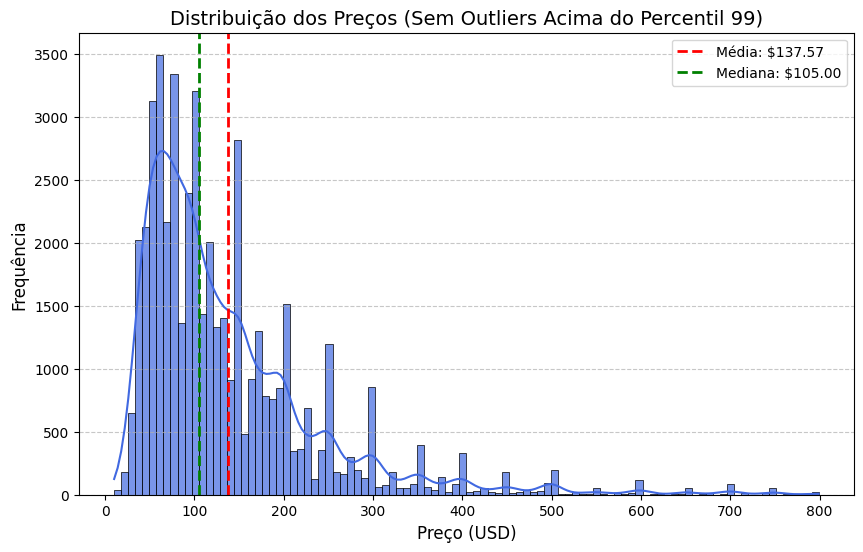

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# estatísticas básicas do preço
print(dados["price"].describe())

# definindo um limite superior para remover outliers (99º percentil)
limite_superior = dados["price"].quantile(0.99)
dados_filtrado = dados[dados["price"] <= limite_superior]

# calculando média e mediana para destacar no gráfico
preco_medio = dados_filtrado["price"].mean()
preco_mediana = dados_filtrado["price"].median()

# criando gráfico
plt.figure(figsize=(10, 6))
sns.histplot(dados_filtrado["price"], bins=100, kde=True, color="royalblue", alpha=0.7)

# adicionando linhas verticais para média e mediana
plt.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
plt.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

plt.xlabel("Preço (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Distribuição dos Preços (Sem Outliers Acima do Percentil 99)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()# mostrando as linhas de média e mediana
plt.show()


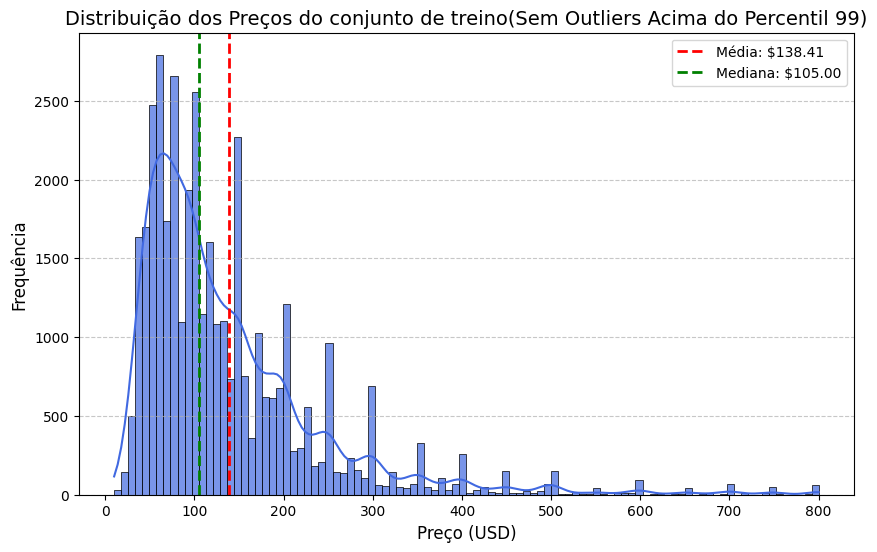

In [6]:
limite_superior = train["price"].quantile(0.99)
train_filtrado = train[train["price"] <= limite_superior]

preco_medio = train_filtrado["price"].mean()
preco_mediana = train_filtrado["price"].median()

plt.figure(figsize=(10, 6))
sns.histplot(train_filtrado["price"], bins=100, kde=True, color="royalblue", alpha=0.7)

plt.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
plt.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

plt.xlabel("Preço (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Distribuição dos Preços do conjunto de treino(Sem Outliers Acima do Percentil 99)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()



In [7]:
# ver tipos de variáveis
print(dados.dtypes.value_counts())

# contagem de valores para variáveis categóricas
for col in ["room_type", "bairro_group"]:
    print(dados[col].value_counts())

int64      7
object     6
float64    3
Name: count, dtype: int64
room_type
Entire home/apt    25407
Private room       22318
Shared room         1158
Name: count, dtype: int64
bairro_group
Manhattan        21660
Brooklyn         20094
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64


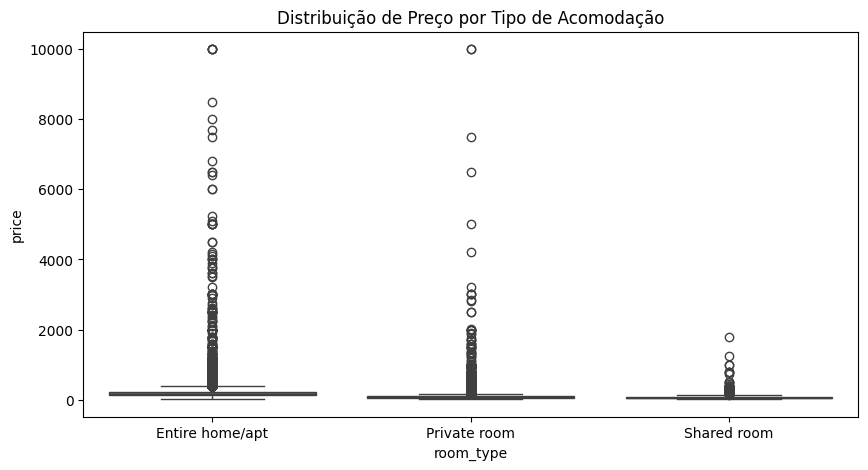

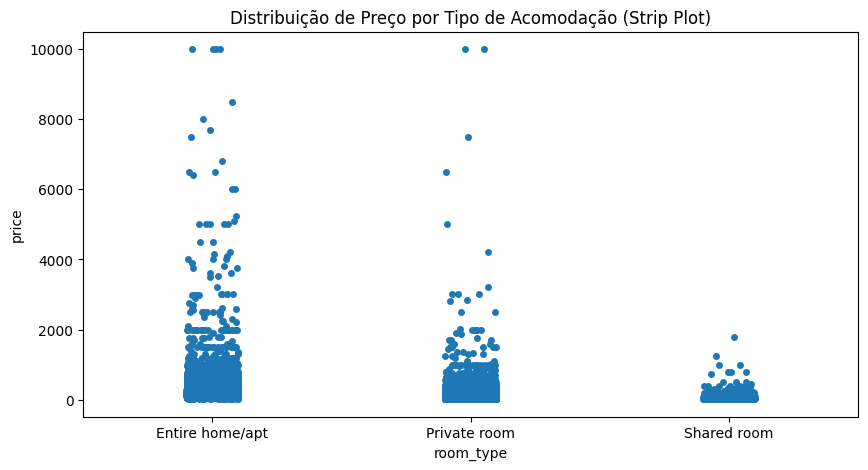

In [ ]:
# boxplot para preço por tipo de acomodação
plt.figure(figsize=(10, 5))
sns.boxplot(x="room_type", y="price", data=dados)
plt.title("Distribuição de Preço por Tipo de Acomodação")
plt.show()
# stripplot para preço por tipo de acomodação
plt.figure(figsize=(10, 5))
sns.stripplot(x="room_type", y="price", data=dados, jitter=True)
#plt.yscale("log")
plt.title("Distribuição de Preço por Tipo de Acomodação (Strip Plot)")
plt.show()


In [9]:
dados.groupby("room_type")["price"].describe() # dos dados sem filtragem dos outliers

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25407.0,211.810918,284.046575,10.0,120.0,160.0,229.0,10000.0
Private room,22318.0,89.806479,160.225592,10.0,50.0,70.0,95.0,10000.0
Shared room,1158.0,70.248705,101.771306,10.0,33.0,45.0,75.0,1800.0


count    25022.000000
mean       189.100272
std        109.658888
min         10.000000
25%        120.000000
50%        160.000000
75%        225.000000
max        799.000000
Name: price, dtype: float64


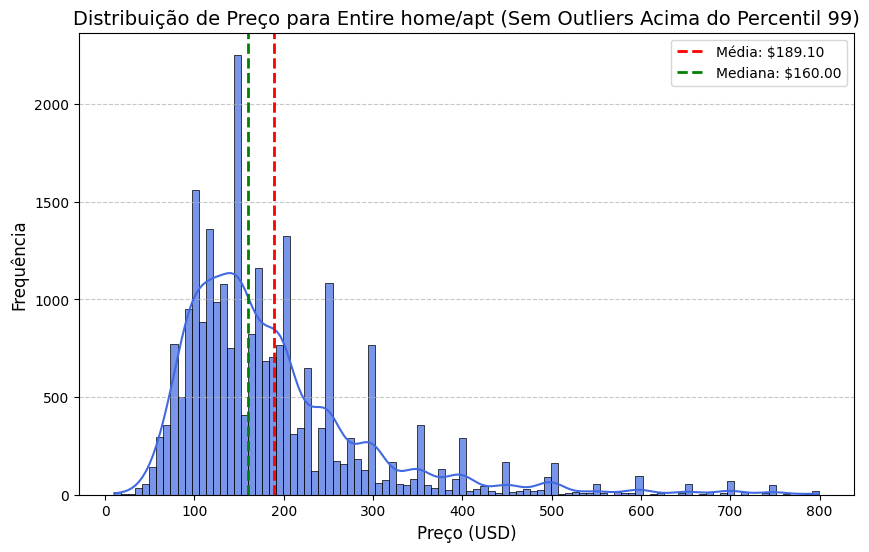

count    22236.000000
mean        83.391797
std         59.365589
min         10.000000
25%         50.000000
50%         70.000000
75%         95.000000
max        799.000000
Name: price, dtype: float64


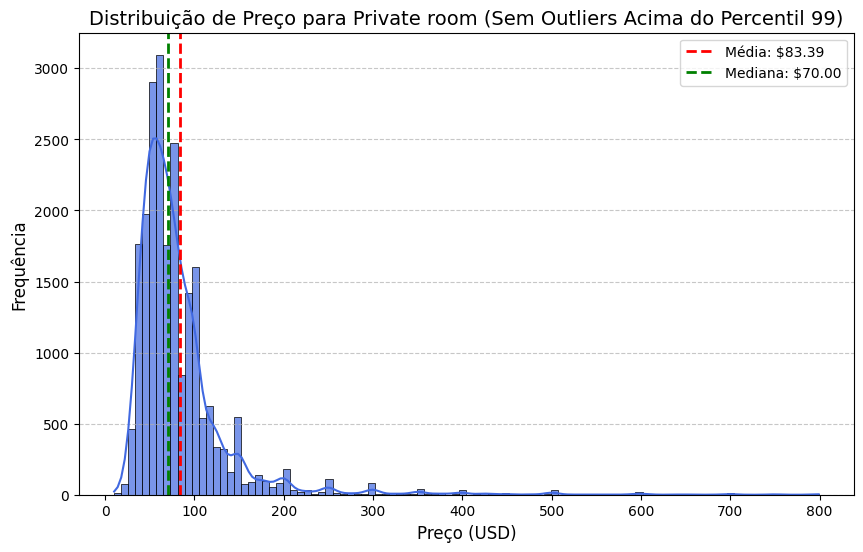

count    1151.000000
mean       64.203301
std        60.656599
min        10.000000
25%        33.000000
50%        45.000000
75%        75.000000
max       725.000000
Name: price, dtype: float64


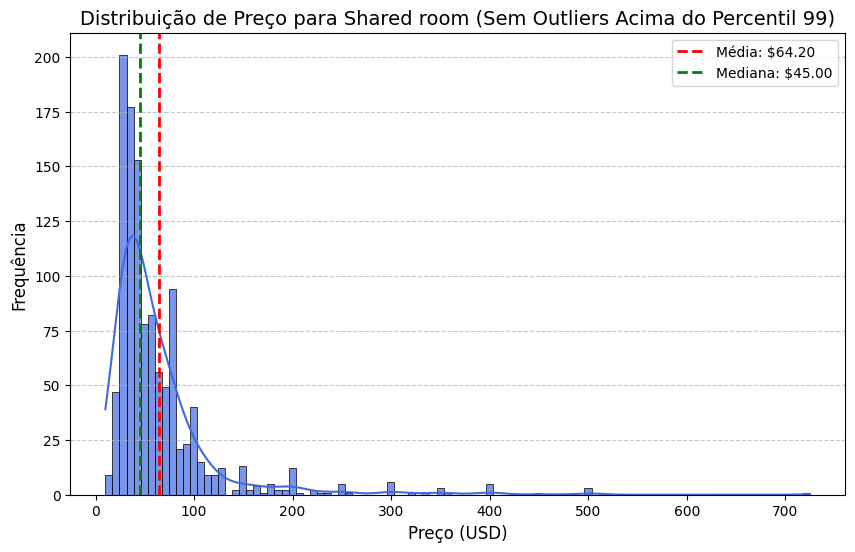

In [10]:
# filtrando os dados para um tipo específico de room_type
room_type_1 = dados_filtrado[dados_filtrado["room_type"] == "Entire home/apt"]
print(room_type_1["price"].describe())

plt.figure(figsize=(10, 6))
sns.histplot(room_type_1["price"], bins=100, kde=True, color="royalblue", alpha=0.7)

# calculando a média e mediana para esse tipo de room_type
preco_medio = room_type_1["price"].mean()
preco_mediana = room_type_1["price"].median()

plt.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
plt.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

# ajustando os labels e título
plt.xlabel("Preço (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title(f"Distribuição de Preço para Entire home/apt (Sem Outliers Acima do Percentil 99)", fontsize=14)

# adicionando a grade e legenda
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# mostrando o gráfico
plt.show()

# fazendo o mesmo com o room_type Private room
room_type_2 = dados_filtrado[dados_filtrado["room_type"] == "Private room"]
print(room_type_2["price"].describe())

plt.figure(figsize=(10, 6))

sns.histplot(room_type_2["price"], bins=100, kde=True, color="royalblue", alpha=0.7)

preco_medio = room_type_2["price"].mean()
preco_mediana = room_type_2["price"].median()

plt.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
plt.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

plt.xlabel("Preço (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title(f"Distribuição de Preço para Private room (Sem Outliers Acima do Percentil 99)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# fazendo o mesmo com o room_type Shared room
room_type_3 = dados_filtrado[dados_filtrado["room_type"] == "Shared room"]
print(room_type_3["price"].describe())

plt.figure(figsize=(10, 6))

sns.histplot(room_type_3["price"], bins=100, kde=True, color="royalblue", alpha=0.7)

preco_medio = room_type_3["price"].mean()
preco_mediana = room_type_3["price"].median()

plt.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
plt.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

plt.xlabel("Preço (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title(f"Distribuição de Preço para Shared room (Sem Outliers Acima do Percentil 99)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

In [11]:
dados.groupby("bairro_group")["price"].mean() # dos dados sem filtragem dos outliers

bairro_group
Bronx             87.577064
Brooklyn         124.437693
Manhattan        196.884903
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [12]:
dados.groupby("bairro_group")["price"].describe() # dos dados sem filtragem dos outliers

,count,mean,std,min,25%,50%,75%,max
bairro_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20094.0,124.437693,186.901408,10.0,60.0,90.0,150.0,10000.0
Manhattan,21660.0,196.884903,291.386838,10.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


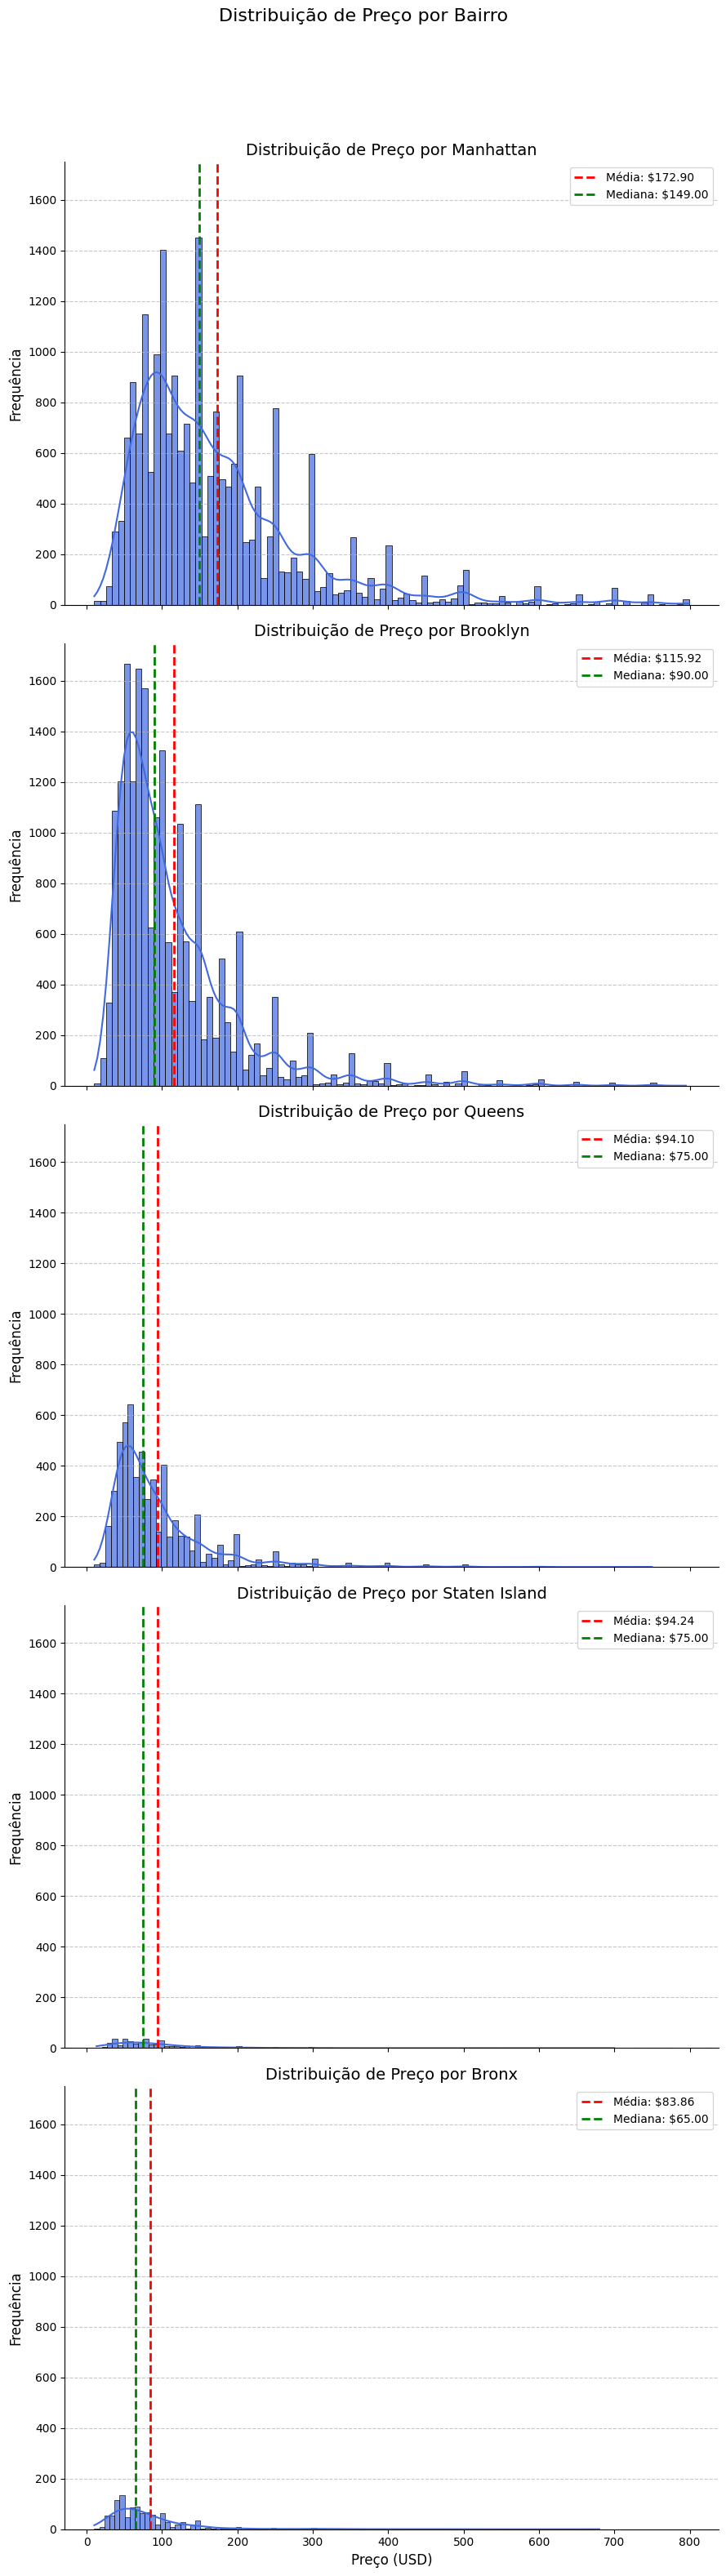

In [13]:
# configurando o FacetGrid para mostrar histograma por bairro_group
g = sns.FacetGrid(dados_filtrado, col="bairro_group", height=6, aspect=1.5, col_wrap=1)

# plotando o histograma com KDE para cada bairro
g.map(sns.histplot, "price", bins=100, kde=True, color="royalblue", alpha=0.7)

for ax, bairro_group in zip(g.axes.flat, dados_filtrado["bairro_group"].unique()):
    preco_medio = dados_filtrado[dados_filtrado["bairro_group"] == bairro_group]["price"].mean()
    preco_mediana = dados_filtrado[dados_filtrado["bairro_group"] == bairro_group]["price"].median()

    ax.axvline(preco_medio, color="red", linestyle="dashed", linewidth=2, label=f'Média: ${preco_medio:.2f}')
    ax.axvline(preco_mediana, color="green", linestyle="dashed", linewidth=2, label=f'Mediana: ${preco_mediana:.2f}')

    ax.set_xlabel("Preço (USD)", fontsize=12)
    ax.set_ylabel("Frequência", fontsize=12)
    ax.set_title(f"Distribuição de Preço por {bairro_group}", fontsize=14)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend()

# ajustando o layout
plt.tight_layout()
plt.suptitle("Distribuição de Preço por Bairro", fontsize=16, y=1.05)
plt.show()


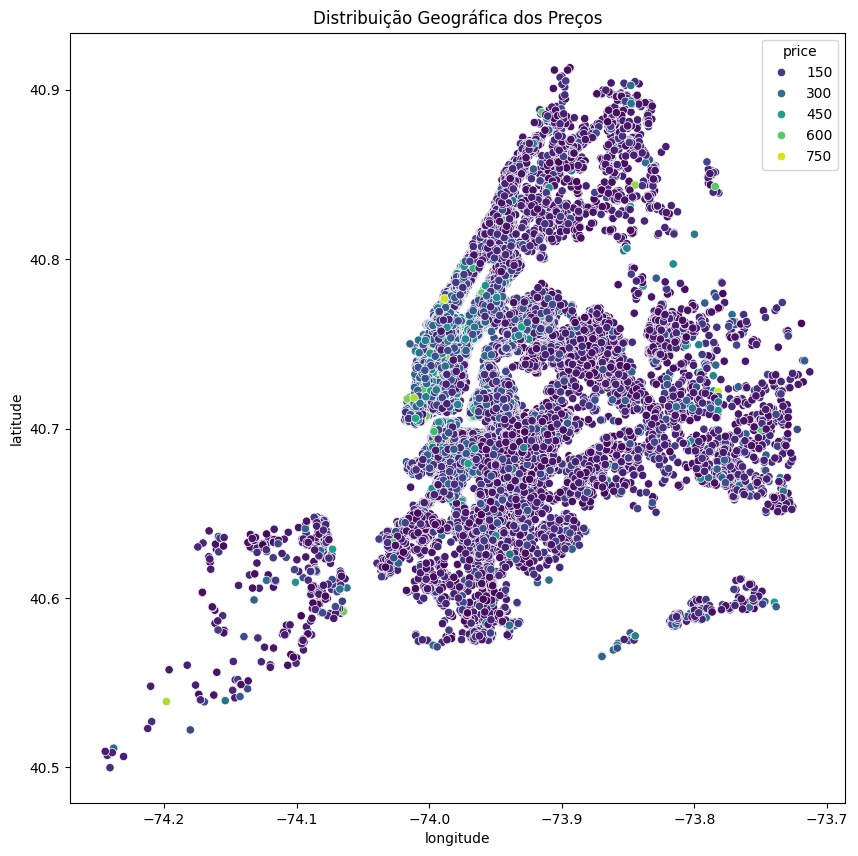

In [ ]:
# scatter plot entre latitude, longitude e preço
plt.figure(figsize=(10, 10))
sns.scatterplot(x=dados_filtrado["longitude"], y=dados_filtrado["latitude"], hue=dados_filtrado["price"], palette="viridis", alpha=1)
plt.title("Distribuição Geográfica dos Preços")
plt.show()


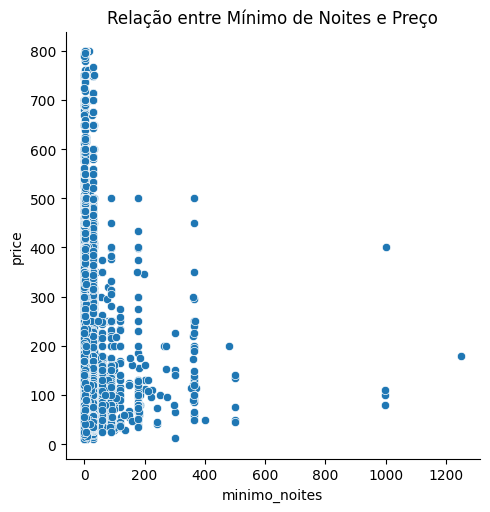

In [15]:
sns.relplot(x=dados_filtrado["minimo_noites"], y=dados_filtrado["price"])
plt.title("Relação entre Mínimo de Noites e Preço")
plt.show()

  bairro_group  bairro_group_encoded        room_type  room_type_encoded
0    Manhattan                     2  Entire home/apt                  0
1    Manhattan                     2     Private room                  1
2     Brooklyn                     1  Entire home/apt                  0
3    Manhattan                     2  Entire home/apt                  0
4    Manhattan                     2  Entire home/apt                  0


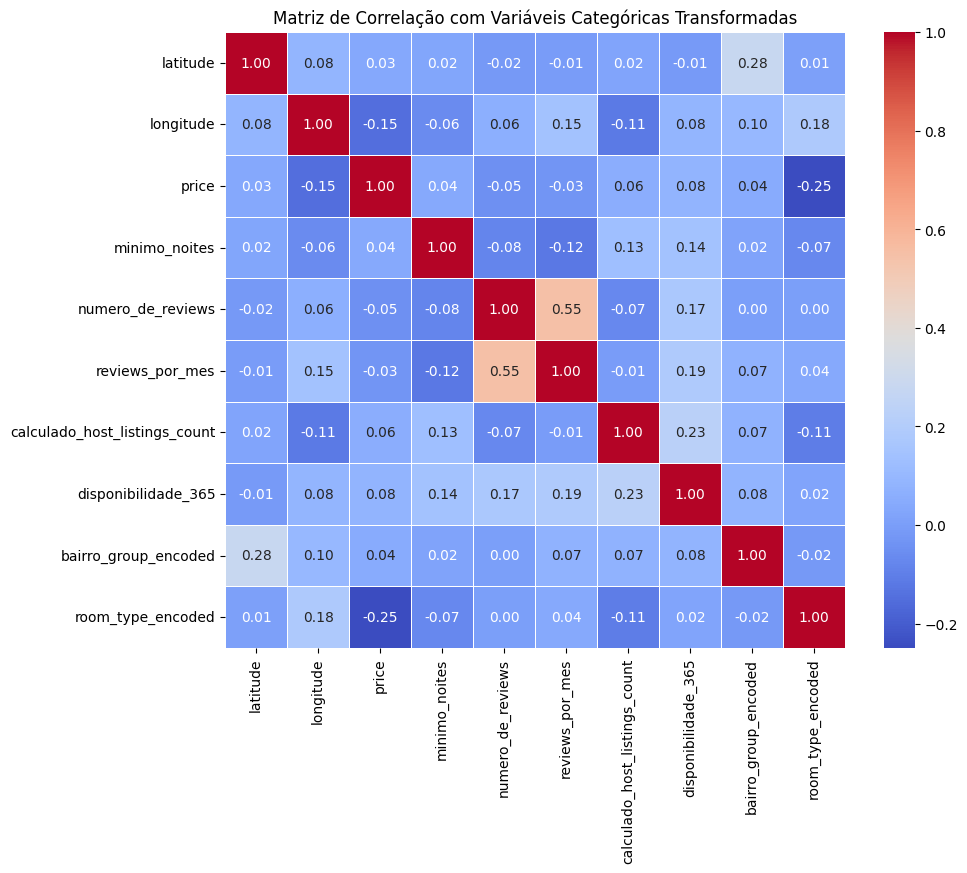

In [24]:
dados.loc[:,'bairro_group_encoded'] = dados['bairro_group'].astype('category').cat.codes
dados.loc[:,'room_type_encoded'] = dados['room_type'].astype('category').cat.codes

# Exibir as primeiras linhas para conferir as mudanças
print(dados[['bairro_group', 'bairro_group_encoded', 'room_type', 'room_type_encoded']].head())

df_numericas = dados[[
    'latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews',
    'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365',
    'bairro_group_encoded', 'room_type_encoded'
]]

# Calcular a matriz de correlação
correlacao = df_numericas.corr()

# Visualizar a matriz de correlação com um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação com Variáveis Categóricas Transformadas')
plt.show()

In [36]:
preco_medio_bairro = dados.groupby('bairro')['price'].mean().sort_values(ascending=False)
print(preco_medio_bairro.head(20))

bairro
Fort Wadsworth        800.000000
Woodrow               700.000000
Tribeca               490.638418
Sea Gate              487.857143
Riverdale             442.090909
Prince's Bay          409.500000
Battery Park City     367.557143
Flatiron District     341.925000
Randall Manor         336.000000
NoHo                  295.717949
SoHo                  287.103352
Midtown               282.719094
Neponsit              274.666667
West Village          267.682292
Greenwich Village     263.405612
Chelsea               249.738544
Willowbrook           249.000000
Theater District      248.013889
Nolita                230.138340
Financial District    225.490591
Name: price, dtype: float64


In [37]:
ocupacao_media = dados.groupby('bairro')['disponibilidade_365'].mean().sort_values(ascending=False)
print(ocupacao_media.head(20))

bairro
Fort Wadsworth    365.000000
Co-op City        364.000000
Willowbrook       351.000000
Eastchester       333.461538
Richmondtown      300.000000
Mill Basin        290.000000
Edgemere          275.272727
Randall Manor     275.210526
West Brighton     274.722222
Spuyten Duyvil    270.000000
Tottenville       267.571429
Arrochar          255.809524
Concord           255.576923
West Farms        244.500000
Corona            244.171875
Unionport         244.000000
Bellerose         242.857143
Grant City        240.333333
Hunts Point       239.166667
Midland Beach     236.000000
Name: disponibilidade_365, dtype: float64


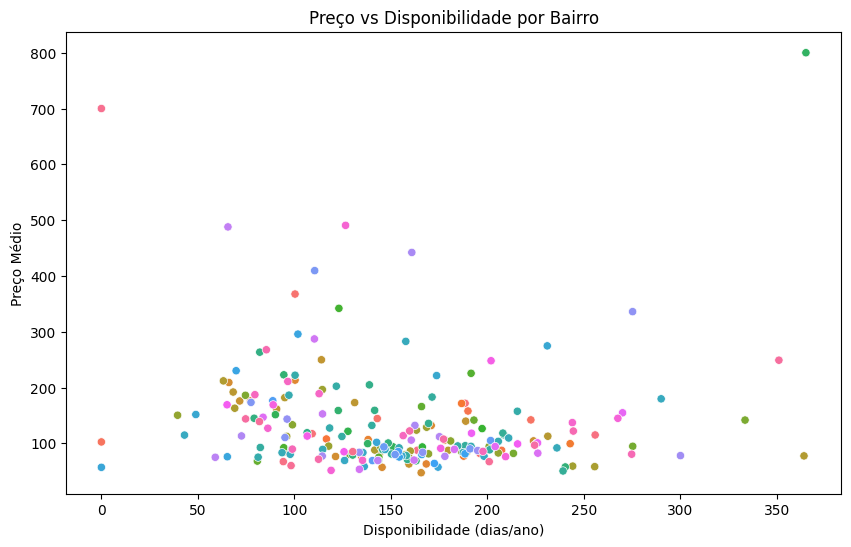

In [43]:
dados_bairro = dados.groupby('bairro').agg({'price': 'mean', 'disponibilidade_365': 'mean'}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=dados_bairro, x='disponibilidade_365', y='price', hue='bairro', legend=False)
plt.title('Preço vs Disponibilidade por Bairro')
plt.xlabel('Disponibilidade (dias/ano)')
plt.ylabel('Preço Médio')
plt.show()


In [45]:
from scipy.stats import pearsonr

# Correlação entre preço e número mínimo de noites
corr_min_nights, p_min_nights = pearsonr(dados['price'], dados['minimo_noites'])
print(f'Correlação entre preço e número mínimo de noites: {corr_min_nights:.3f}, p-valor={p_min_nights:.3f}')

# Correlação entre preço e disponibilidade
corr_availability, p_availability = pearsonr(dados['price'], dados['disponibilidade_365'])
print(f'Correlação entre preço e disponibilidade: {corr_availability:.3f}, p-valor={p_availability:.3f}')


Correlação entre preço e número mínimo de noites: 0.043, p-valor=0.000
Correlação entre preço e disponibilidade: 0.082, p-valor=0.000


In [ ]:
from scipy import stats

quarto_privado = dados[dados['room_type'] == 'Private room']['price']
quarto_inteiro = dados[dados['room_type'] == 'Entire home/apt']['price']
quarto_compartilhado = dados[dados['room_type'] == 'Shared room']['price']

# ANOVA: Comparação de preços entre três tipos de quartos
anova_stat, p_valor_anova = stats.f_oneway(quarto_privado, quarto_inteiro, quarto_compartilhado)
print(f'Teste ANOVA para tipos de quartos: F={anova_stat:.3f}, p-valor={p_valor_anova:.3f}')

if p_valor_anova < 0.05:
    print('Existe uma diferença significativa entre os preços dos diferentes tipos de quartos.')
else:
    print('Nenhuma diferença significativa entre os preços dos diferentes tipos de quartos.')


Teste ANOVA para tipos de quartos: F=1715.408, p-valor=0.000
Existe uma diferença significativa entre os preços dos diferentes tipos de quartos.


In [ ]:
# definindo o limite de alto valor como o percentil 90
limite_alto_valor = dados["price"].quantile(0.90)

# filtrando anúncios acima desse valor
df_caro = dados[dados["price"] > limite_alto_valor]

from collections import Counter
import re

# juntando todos os nomes dos locais mais caros
texto_caro = " ".join(df_caro["nome"].dropna()).lower()

# remove pontuações e dividi em palavras
palavras = re.findall(r'\b\w+\b', texto_caro)

# contando palavras mais frequentes
contagem_palavras = Counter(palavras)

# exibindo as 20 palavras mais comuns
print(contagem_palavras.most_common(20))

limite_baixo_valor = dados["price"].quantile(0.10)
df_barato = dados[dados["price"] < limite_baixo_valor]

texto_barato = " ".join(df_barato["nome"].dropna()).lower()
palavras_barato = re.findall(r'\b\w+\b', texto_barato)
contagem_palavras_barato = Counter(palavras_barato)

print("Palavras mais comuns em locais baratos:")
print(contagem_palavras_barato.most_common(20))




[('in', 1200), ('2', 833), ('bedroom', 717), ('apartment', 552), ('apt', 511), ('luxury', 474), ('loft', 466), ('w', 437), ('the', 407), ('village', 383), ('park', 371), ('manhattan', 363), ('3', 352), ('with', 347), ('of', 332), ('spacious', 312), ('nyc', 312), ('east', 309), ('1', 302), ('west', 285)]
Palavras mais comuns em locais baratos:
[('room', 2240), ('in', 1798), ('private', 1004), ('cozy', 739), ('bedroom', 662), ('brooklyn', 564), ('to', 525), ('apartment', 352), ('bushwick', 351), ('manhattan', 330), ('and', 328), ('a', 320), ('bed', 308), ('near', 306), ('spacious', 303), ('sunny', 296), ('the', 281), ('with', 260), ('for', 256), ('1', 235)]


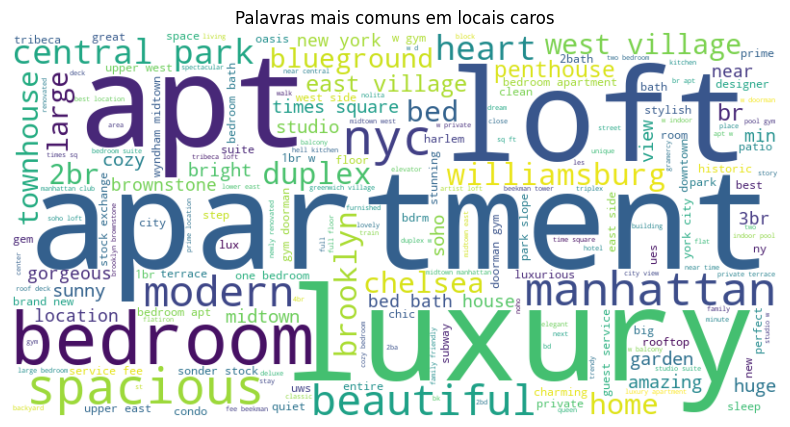

In [ ]:
from wordcloud import WordCloud

# criando e exibindo a nuvem de palavras para locais caros
wordcloud_caro = WordCloud(width=800, height=400, background_color="white").generate(texto_caro)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_caro, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em locais caros")
plt.show()


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1        group2     meandiff p-adj    lower     upper   reject
------------------------------------------------------------------------
Entire home/apt Private room -122.0044    0.0 -126.9966 -117.0123   True
Entire home/apt  Shared room -141.5622    0.0 -157.9131 -125.2113   True
   Private room  Shared room  -19.5578 0.0144  -35.9579   -3.1576   True
------------------------------------------------------------------------


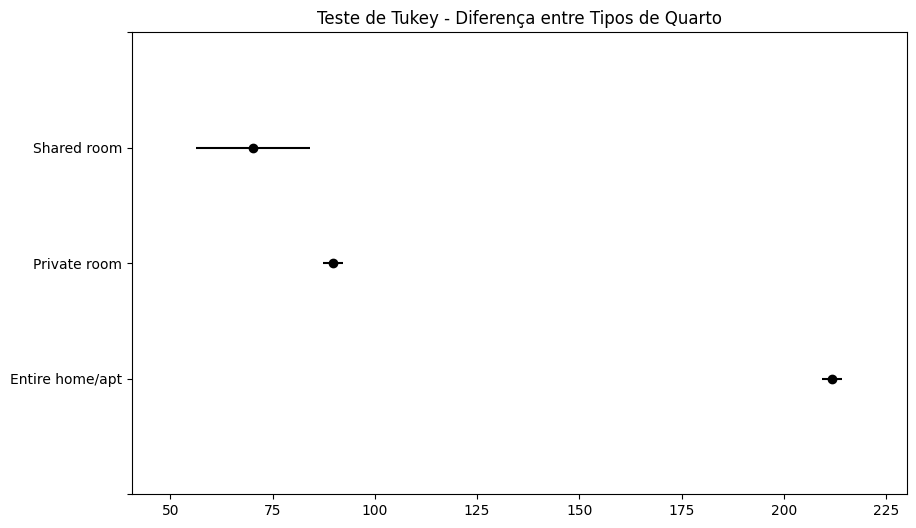

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# preparando os dados para o teste de Tukey
dados_tukey = dados[dados['room_type'].isin(['Private room', 'Entire home/apt', 'Shared room'])]

# teste de Tukey para comparações múltiplas
tukey = pairwise_tukeyhsd(endog=dados_tukey['price'], groups=dados_tukey['room_type'], alpha=0.05)
print(tukey)

# visualiza o resultado
import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.title('Teste de Tukey - Diferença entre Tipos de Quarto')
plt.show()

In [33]:
# comparando preços entre quartos privados e apartamentos inteiros
t_stat1, p_valor1 = stats.ttest_ind(quarto_privado, quarto_inteiro, equal_var=False)
print(f'Teste t (Privado vs Inteiro): t={t_stat1:.3f}, p-valor={p_valor1:.3f}')

# comparando preços entre quartos privados e quartos compartilhados
t_stat2, p_valor2 = stats.ttest_ind(quarto_privado, quarto_compartilhado, equal_var=False)
print(f'Teste t (Privado vs Compartilhado): t={t_stat2:.3f}, p-valor={p_valor2:.3f}')

# comparando preços entre apartamentos inteiros e quartos compartilhados
t_stat3, p_valor3 = stats.ttest_ind(quarto_inteiro, quarto_compartilhado, equal_var=False)
print(f'Teste t (Inteiro vs Compartilhado): t={t_stat3:.3f}, p-valor={p_valor3:.3f}')


Teste t (Privado vs Inteiro): t=-58.659, p-valor=0.000
Teste t (Privado vs Compartilhado): t=6.156, p-valor=0.000
Teste t (Inteiro vs Compartilhado): t=40.663, p-valor=0.000


In [34]:
stat_ks, p_ks = stats.kstest(dados['price'], 'norm')
print(f'Teste Kolmogorov-Smirnov: Estatística={stat_ks:.3f}, p-valor={p_ks:.3f}')


Teste Kolmogorov-Smirnov: Estatística=1.000, p-valor=0.000


In [46]:
import statsmodels.api as sm

# regressão linear com mínimo de noites
X = sm.add_constant(dados['minimo_noites'])
modelo_min_nights = sm.OLS(dados['price'], X).fit()
print(modelo_min_nights.summary())

# regressão linear com disponibilidade
X = sm.add_constant(dados['disponibilidade_365'])
modelo_availability = sm.OLS(dados['price'], X).fit()
print(modelo_availability.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     89.73
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.85e-21
Time:                        14:36:48   Log-Likelihood:            -3.3726e+05
No. Observations:               48883   AIC:                         6.745e+05
Df Residuals:                   48881   BIC:                         6.745e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           149.2318      1.147    130.075

### **1. Onde seria mais indicado comprar um apartamento para alugar na plataforma?**

**Manhattan** aparece como a região com o preço médio mais alto:
- **Preço médio em Manhattan:** \$196,88
- Outros bairros:
  - **Brooklyn:** \$124,44
  - **Queens:** \$99,51
  - **Bronx:** \$87,57
  - **Staten Island:** \$114,81

**Conclusão:**  
Se o objetivo é **maximizar o preço do aluguel**, investir em **Manhattan** parece ser a melhor escolha. No entanto, considere também a **ocupação** e a **competitividade** do mercado na região. **Brooklyn** pode ser uma boa alternativa, com preços mais acessíveis para compra e ainda com boa rentabilidade.

---

### **2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

- **Correlação entre preço e número mínimo de noites:** **0.043**  
- **Correlação entre preço e disponibilidade:** **0.082**  

Ambas as correlações são **positivas**, mas **muito fracas**. Isso sugere que:
- **Aumentar o número mínimo de noites ou a disponibilidade ao longo do ano tem pouco impacto direto no preço.**

O **modelo de regressão OLS** também confirma:
- **Coeficiente para número mínimo de noites:** **0.5012** (a cada noite mínima adicional, o preço sobe cerca de \$0,50 em média).

**Conclusão:**  
Embora haja uma **ligação estatística**, ela é **fraca**. Fatores como localização e tipo de quarto têm impacto muito maior.

---

### **3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

Palavras mais comuns em **locais caros**:
- `'luxury'`, `'loft'`, `'village'`, `'park'`, `'spacious'`, `'manhattan'`

Palavras mais comuns em **locais baratos**:
- `'room'`, `'private'`, `'cozy'`, `'brooklyn'`, `'bushwick'`, `'sunny'`

**Conclusão:**  
- **Listagens caras** tendem a usar palavras como **"luxury"**, **"loft"**, **"village"**, o que transmite uma imagem de sofisticação.
- **Listagens baratas** frequentemente usam termos como **"room"**, **"cozy"**, e referenciam bairros como **Brooklyn** e **Bushwick**.

Para quem quer **atrair mais inquilinos dispostos a pagar mais**, usar descrições que destacam luxo, espaço e localização premium pode ser eficaz.

---